In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat = pd.read_csv('./StudentPerformanceFactors.csv')

In [3]:
dat.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
categorical_df = dat.select_dtypes(include=['object', 'category'])
numerical_df = dat.select_dtypes(include=['number'])

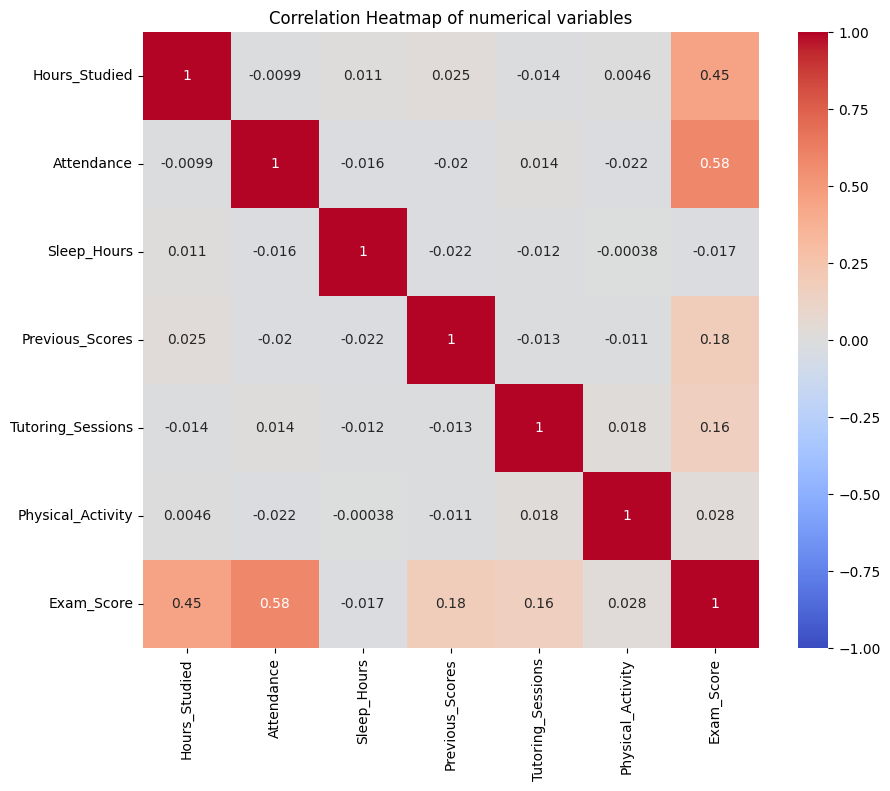

In [5]:
#Correlation heatmap for numerical variables
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap of numerical variables")
plt.show()

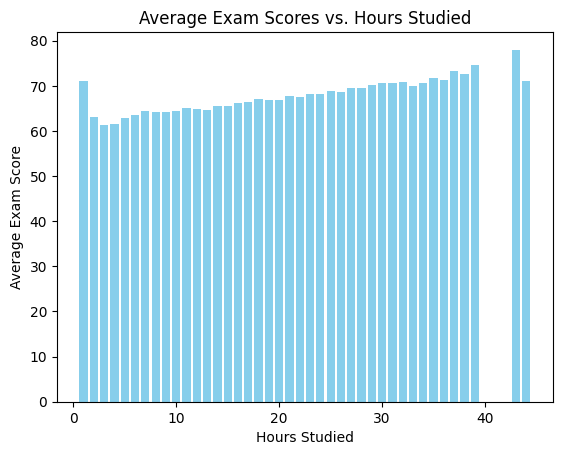

In [6]:
#Hours studied vs exam score histogram
avg_scores = dat.groupby('Hours_Studied')['Exam_Score'].mean()
# Plotting the data
plt.bar(avg_scores.index, avg_scores.values, color='skyblue')

# Label axes
plt.xlabel('Hours Studied')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores vs. Hours Studied')

# Show plot
plt.show()

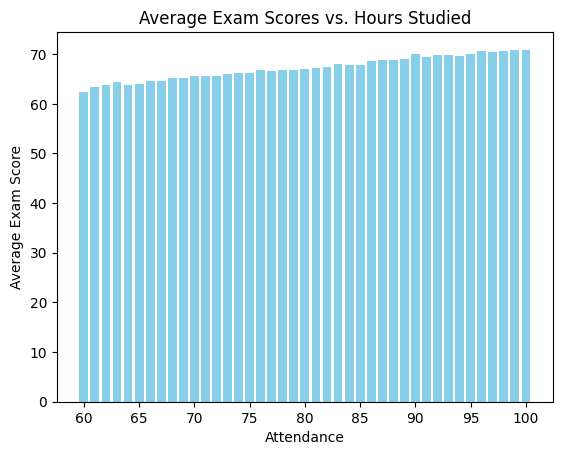

In [8]:
#Attendance vs exam score histogram
avg_scores = dat.groupby('Attendance')['Exam_Score'].mean()
# Plotting the data
plt.bar(avg_scores.index, avg_scores.values, color='skyblue')

# Label axes
plt.xlabel('Attendance')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores vs. Hours Studied')

# Show plot
plt.show()

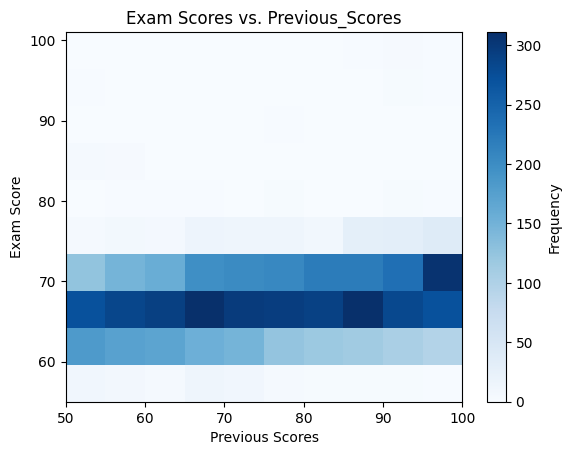

In [5]:
# Create a 2D histogram
plt.hist2d(dat['Previous_Scores'], dat['Exam_Score'], bins=(10, 10), cmap='Blues')

# Add color bar for reference
plt.colorbar(label='Frequency')

# Label axes
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Exam Scores vs. Previous_Scores')

# Show plot
plt.show()

In [15]:
print(dat['Previous_Scores'].min(), dat['Previous_Scores'].max(), dat['Exam_Score'].min(), dat['Exam_Score'].max())

50 100 55 101


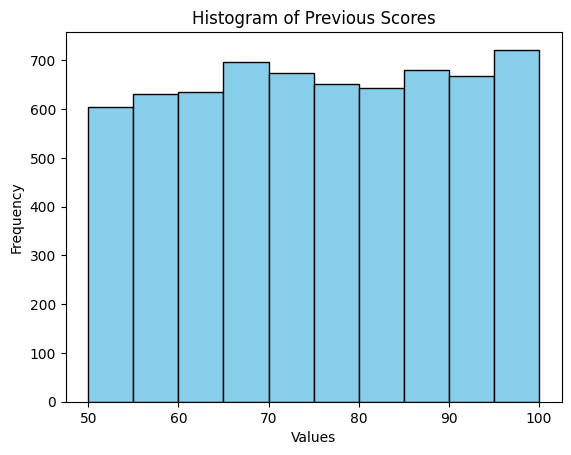

In [16]:
plt.hist(dat['Previous_Scores'], bins=10, color='skyblue', edgecolor='black')

# Label axes
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Previous Scores')

# Show plot
plt.show()

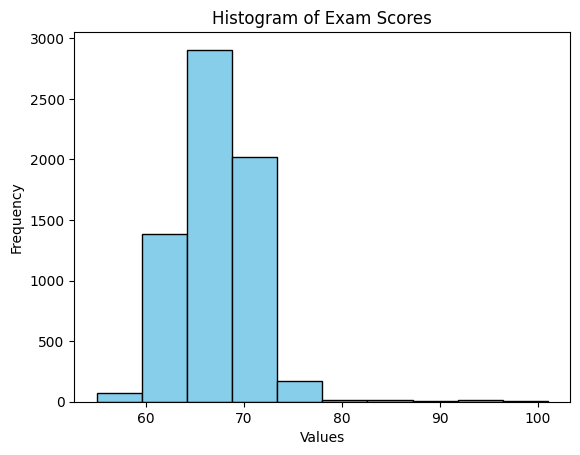

In [19]:
plt.hist(dat['Exam_Score'], bins=10, color='skyblue', edgecolor='black')

# Label axes
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Exam Scores')

# Show plot
plt.show()

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# One-hot encode categorical variables and drop target variable 'Exam_Score' from features
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 
                       'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

dat_encoded = pd.get_dummies(dat, columns=categorical_columns, drop_first=True)

# Separate features and target variable
X = dat_encoded.drop(columns=['Exam_Score'])
y = dat_encoded['Exam_Score']

# Correlation analysis for numerical features
correlations = X.corrwith(y).sort_values(ascending=False)

# Statistical test (ANOVA-based) for categorical features using SelectKBest
# Using f_regression for feature scoring based on their correlation with the target
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
anova_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)

feature_selection_results = pd.DataFrame({
    "Correlation": correlations,
    "ANOVA Score": anova_scores
})
feature_selection_results

,Correlation,ANOVA Score
Access_to_Resources_Low,-0.132155,117.405623
Access_to_Resources_Medium,-0.026158,4.522401
Attendance,0.581072,3366.986498
Distance_from_Home_Moderate,-0.043019,12.246321
Distance_from_Home_Near,0.084870,47.919911
Extracurricular_Activities_Yes,0.064382,27.491709
Family_Income_Low,-0.082025,44.740562
Family_Income_Medium,0.020995,2.912579
Gender_Male,-0.002032,0.027281
Hours_Studied,0.445455,1635.080039
